# Instructions

- This assignment was posted on 11 September, 2024 and is due on 27 September 2024, at 11:59 pm
- Answer all questions in this Jupyter notebook skeleton within the provided cells. Questions will indicate whether the answer should take the form of a coded or written response. Use the dropdown menu within the Jupyter interface to toggle between 'Markdown' or 'Code' for the cells. Do NOT delete or rearrange any of the question blocks within this skeleton.
- The following two files should be submitted to LEARN:
    - This IPYNB file containing the questions and your answers in either code or markdown.
    - A PDF printout of this IPYNB file. To generate this, first run and save the output of all cells. Then expand all cells and print as PDF. Be sure that all your code and answers are visible in the PDF document you submit. 

# PART I. Classification

## Exercise 1. 
This exercise was adapted from CS480/680 Assignment 1 as taught in Winter 2024, designed by Shufan Zhang and Hongyang Zhang. 

**[ 20 marks ]** Implement the Perceptron algorithm and multiclass extension using the one-vs-all strategy **from scratch** and evaluate it on the provided Iris dataset, for which the output variable can take on 3 values. The only Python libraries you are permitted are Pandas, NumPy and Matplotlib. 

In [2]:
### SOLUTION BLOCK ###

## Permitted libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Multi-class Extension of the Perceptron Algorithm ##
## Add your implementation here ##
iris_data = pd.read_csv('./iris.csv')

x = iris_data.iloc[:, :-1].values
y = pd.factorize(iris_data['variety'])[0]
(n_examples, d_model) = x.shape
n_classes = len(np.unique(y))

# Add dummy bias var
x_nd = np.hstack((x, np.ones((n_examples, 1))))
y_nc = np.zeros((n_examples, n_classes))
y_nc[np.arange(n_examples), y] = 1

def mlp(x_nd, y_nc, epochs):
    (n_examples, d_model) = x_nd.shape
    (_, num_classes) = y_nc.shape

    weights_dc = np.zeros((d_model, num_classes))
    
    train_losses = []
    train_accuracies = []

    for _ in range(epochs):
        logits_nc = x_nd @ weights_dc
        y_hat_nc = np.exp(logits_nc) / np.sum(np.exp(logits_nc), axis=1, keepdims=True)

        loss = np.mean(- y_nc * np.log(y_hat_nc))
        accuracy = np.mean(np.argmax(y_hat_nc, axis=1) == np.argmax(y_nc, axis=1))
        train_losses.append(loss)
        train_accuracies.append(accuracy)

        dW_dc = x_nd.T @ (y_hat_nc - y_nc) / n_examples
        weights_dc -= 0.1 * dW_dc

    return train_losses, train_accuracies, weights_dc

**[ 10 marks ]** Train the algorithm using an 2/3:1/3 train/test split of the data, and run the algorithm for 10 iterations, where each iteration uses the entire training dataset. 

In [5]:
### SOLUTION BLOCK ###
## Add your code to train the multiclass perceptron here ##

indices = np.arange(n_examples)
np.random.shuffle(indices)

train_indices = indices[:int(2*n_examples/3)]
test_indices = indices[int(2*n_examples/3):]

x_train_nd = x_nd[train_indices]
y_train_nc = y_nc[train_indices]

x_test_nd = x_nd[test_indices]
y_test_nc = y_nc[test_indices]

train_losses, train_accuracies, weights_dc = mlp(x_train_nd, y_train_nc, 10)

**[ 10 marks ]** Plot the training curves, that is, the accuracies associated with the low-level classifiers at each training iteration, as well as the accuracy of the high-level classifier. Be sure to label your x- and y-axes as well a legend. Report the accuracy on the test data.

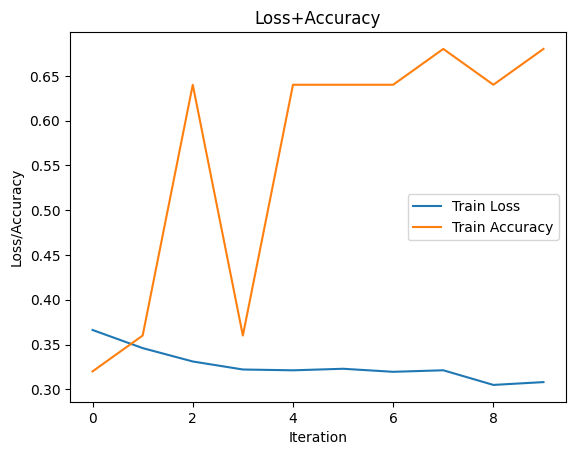

Test Acc: 0.72


In [6]:
### SOLUTION BLOCK ###
## Add your code to visualize the training curves here ##

plt.plot(train_losses, label='Train Loss')
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('Loss+Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

def compute_accuracy(x_nd, y_nc, weights_dc):
    logits_nc = x_nd @ weights_dc
    y_hat_nc = np.exp(logits_nc) / np.sum(np.exp(logits_nc), axis=1, keepdims=True)
    return np.mean(np.argmax(y_hat_nc, axis=1) == np.argmax(y_nc, axis=1))

test_accuracy = compute_accuracy(x_test_nd, y_test_nc, weights_dc)
print(f'Test Acc: {test_accuracy}')


**[ 10 marks ]** What can you conclude about the classes and the appropriateness of the Perceptron algorithm?

##### [ SOLUTION BLOCK: Write your response to the question here. ]

The fact that it gets 70% accuracy on the test set is decent, but since there are three classes, a 70% accuracy isn't great. The fact that almost 1/3 of the dats isn't classified correctly means that the underlying data is not likely linearly separable and that a MLP is not the best model to use. 


# PART II. Regression

### Exercise 1. 
Many phenomena associated with complex networks exhibit heavy-tailed distributions. For example, the number of followers a user has on the social media platform formerly known as Twitter has been characterized by a power law distribution:

$
y = \alpha x ^\beta
$

where $x$ is the number of followers, $y$ is the frequency of occurrence, and $\alpha$ and $\beta$ are parameters. 

**[10 marks]** Show that the estimation of parameters $\alpha$ and $\beta$ is a convex optimization problem, and provide a domain for which your assertion holds.

##### [ SOLUTION BLOCK: Write your response here ]

If we take the log of both sides, we get:

$$
\log y = \log \alpha + \beta \log x
$$

If we define each of $\log y$, $\log \alpha$, and $\log x$ as new variables, this becomes a linear regression problem and in the slides we derive how to solve it using least squares, and show that it is convex b/c the loss function we minimize: sum(y - (alpha + beta x))^2 is quadratic and therefore convex.

This assertion holds for the range of values for where $\log x$, $\log y$, $\log \alpha$ are defined, which is for all $x,y,\alpha > 0$.


### Exercise 2.

**[ 10 marks ]**
This exercise was adapted from CS480/680 Assignment 1 as taught in Fall 2023, designed by Prof Gautam Kamath.   

Recall that ridge regression refers to problem

$
\textrm{min}_{w\in\mathbb{R}^d,b\in\mathbb{R}} \frac{1}{2k}\|Xw +b\mathbb{1} - y\|_2^2 + \lambda \|w\|_2^2
$   

where $X\in\mathbb{R}^{k\times d}$, and $y \in \mathbb{R}^k$ are the given dataset and $\lambda$ is the regularization hyperparameter.
Visualize the loss function surface for each of $\lambda = 0$, $\lambda = 0.1$, and $\lambda = 1$ for the "Mystery.csv" dataset provided.

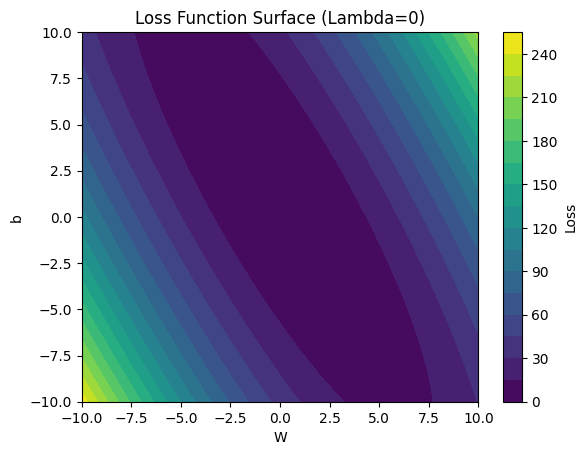

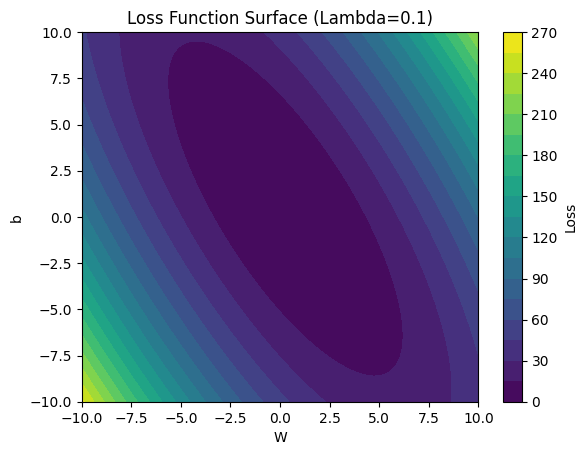

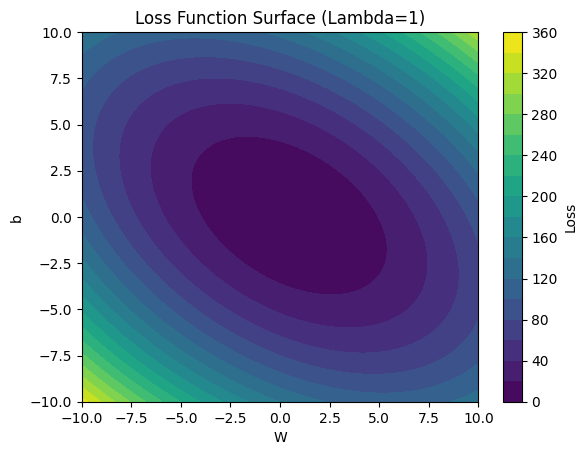

In [7]:
### SOLUTION BLOCK ###
## Add your code here to visualize the loss function surfaces. 

mystery_data = pd.read_csv('./Mystery.csv')

x = mystery_data['X'].values
y = mystery_data['y'].values
n_examples = len(x)

def loss(x, y, w, b, l):
    y_hat = np.dot(x, w) + b
    loss = np.mean((y_hat - y) ** 2) + l * np.sum(w ** 2)
    return loss

grid_size = 100
ws = np.linspace(-10, 10, grid_size)
bs = np.linspace(-10, 10, grid_size)

def compute_loss_grid(x, y, ws, bs, ls):
    for l in ls:
        loss_grid = np.zeros((grid_size, grid_size))
        for i in range(grid_size):
            for j in range(grid_size):
                loss_grid[i, j] = loss(x, y, ws[i], bs[j], l)
        
        plt.contourf(ws, bs, loss_grid, levels=20, cmap='viridis')
        plt.colorbar(label='Loss')
        plt.xlabel('W')
        plt.ylabel('b')
        plt.title(f'Loss Function Surface (Lambda={l})')
        plt.show()

compute_loss_grid(x, y, ws, bs, [0, 0.1, 1])


# PART III. Clustering

### Exercise 1. 

Recall that in $k$-Means clustering, we are interested in minimizing the average $L_2$ distances between a pair of points $x_i, x_i'$ that lie within a cluster $C_j$:

$
\textrm{min}_{\textrm{partition} C_1,...C_k} \frac{1}{\|C_j\|}\sum_{x_i,x_i \in C_j} \|x_i - x_i'\|^2
$

**[ 20 marks ]** Implement K-means clustering using Lloyd's algorithm we learned in class **from scratch**. You may use NumPy only.

In [8]:
### SOLUTION BLOCK ###
## Add your implementation here ##

def kmeans(x_nd, k, epochs=100):
    n_examples, d_model = x_nd.shape
    x_n1d = x_nd[:, np.newaxis, :]
    centroid_idxs = np.random.choice(np.arange(n_examples), k)
    centroids_1kd = x_nd[centroid_idxs].reshape(1, k, d_model)

    for _ in range(epochs):
        distances_nk = np.sum((x_n1d - centroids_1kd)**2, axis=-1)
        labels_n = np.argmin(distances_nk, axis=-1)

        for i in range(k):
            centroids_1kd[:, i] = np.mean(x_nd[labels_n == i], axis=0)
    
    distances_nk = np.sum((x_n1d - centroids_1kd)**2, axis=-1)
    labels_n = np.argmin(distances_nk, axis=-1)

    return labels_n, centroids_1kd

### Exercise 2

**[ 10 marks ]** Generate an artficial dataset with 600 observations, 2 features, and 3 recognizeably distinct clusters that exposes the limitations of K-means clustering. That is, the K-means clustering should to do poorly in terms of recognizing the true clusters in the dataset. Run your algorithm on the dataset and plot the results, alongside that achieved by using the implementation from the Sci-Kit Learn package. Describe the nature of the failure, and explain its cause by making appropriate reference to the objective function and the characteristics of the dataset.

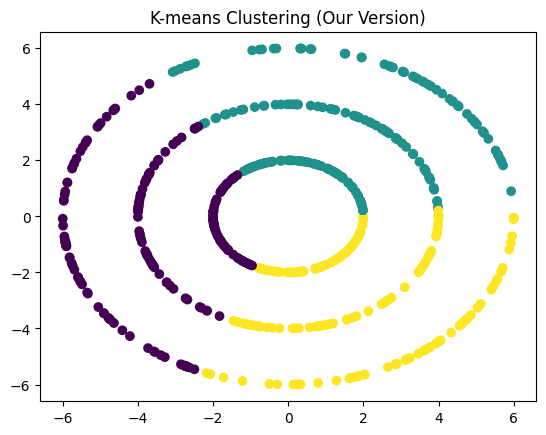

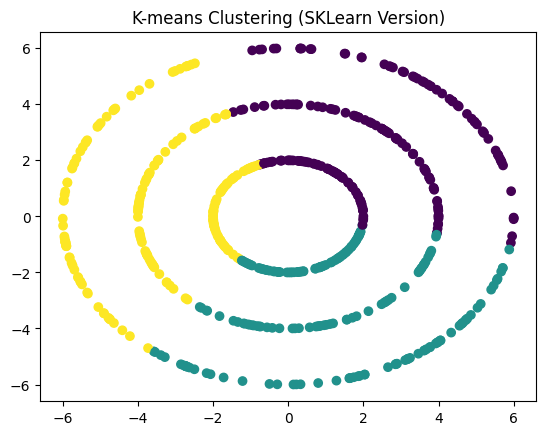

In [13]:
### Solution Block ###
# put your code to visualize the clustering here #

def generate_data(scale, n_examples):
    angles = np.random.uniform(0, 2 * np.pi, n_examples)
    radius = np.random.uniform(1 * scale + scale, 2 * scale, n_examples)
    x_vals = radius * np.cos(angles)
    y_vals = radius * np.sin(angles)

    x_nd = np.column_stack((x_vals, y_vals))
    return x_nd

x_1_nd = generate_data(1, 200)
x_2_nd = generate_data(2, 200)
x_3_nd = generate_data(3, 200)
x_nd = np.concatenate((x_1_nd, x_2_nd, x_3_nd))

labels_n, centroids_1kd = kmeans(x_nd, 3)

plt.scatter(x_nd[:, 0], x_nd[:, 1], c=labels_n)
plt.title('K-means Clustering (Our Version)')
plt.show()

import sklearn
import sklearn.cluster
labels = sklearn.cluster.KMeans(n_clusters=3).fit_predict(x_nd)
plt.scatter(x_nd[:, 0], x_nd[:, 1], c=labels)
plt.title('K-means Clustering (SKLearn Version)')
plt.show()

# The data here is three overlapping circles, kmeans will try to cluster data into three clusers by minimizig the summ of the squared distances between every point and a centroid point for each cluster. The issue here is that the data is not distributed in a dense cluster around a centroid

### Exercise 3. 

**[ 10 marks ]** Investigate the computational complexity of the algorithm as a function of the number of clusters, the number of observations, the number of features, and the maximum number of iterations. 
That is, measure the wall clock time elapsed in different conditions, by sweeping over one variable while holding the remainder fixed. Explore over the ranges and conditions specified in the table below. For each variable explored, plot the wall clock time against the value of the variable being explored.

| Explored Variable   | Range                     | # Observations | # Features | # Clusters | Max. # Iterations |
| ------------------- | ------------------------- | -------------- | ---------- | ---------- | ----------------- | 
| # Observations      | [200,500,1000,2000,5000]  | See Range.     | 2          |  3         | 100               | 
| # Features          | [2,5,10,20,50]            | 500            | See Range. |  3         | 100               |
| # Clusters          | [2,5,10,20,50]            | 500            | 2          |  See Range.| 100               |
| Max. # Iterations   | [20,50,100,200,500]       | 500            | 2          |  3         | See Range.        |

In [18]:
### Solution block ###
# Add your code here to explore the complexity of Lloyd's algorithm for K-Means clustering.

import time

observations = [200, 500, 1000, 2000, 5000]
features = [2, 5, 10, 20, 50]
clusters = [2, 5, 10, 20, 50]
iterations = [20, 50, 100, 200, 500]

obs_times = []
feat_times = []
clus_times = []
iter_times = []

def generate_data(n_obs, n_feat, n_clus):
    cluster_size = n_obs // n_clus
    x_nd = np.zeros((n_obs, n_feat))
    for i in range(n_clus):
        x_nd[i * cluster_size:(i + 1) * cluster_size, :] = np.random.randn(cluster_size, n_feat) + np.random.randn(1, n_feat)
    return x_nd

def time_kmeans(n_obs=500, n_feat=2, n_clus=3, n_iter=100):
    x_nd = generate_data(n_obs, n_feat, n_clus)
    start_time = time.time()
    kmeans(x_nd, n_clus, n_iter)
    end_time = time.time()
    return end_time - start_time

for n_obs in observations:
    obs_times.append(time_kmeans(n_obs=n_obs))

for n_feat in features:
    feat_times.append(time_kmeans(n_feat=n_feat))

for n_clus in clusters:
    clus_times.append(time_kmeans(n_clus=n_clus))

for n_iter in iterations:
    iter_times.append(time_kmeans(n_iter=n_iter))



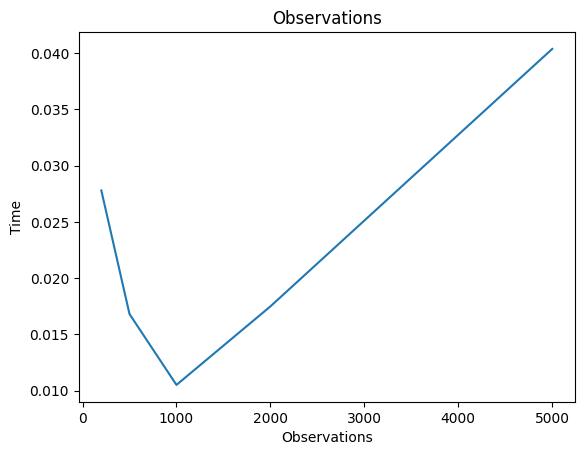

In [19]:
plt.plot(observations, obs_times, label='Observations')
plt.title('Observations')
plt.xlabel('Observations')
plt.ylabel('Time')
plt.show()

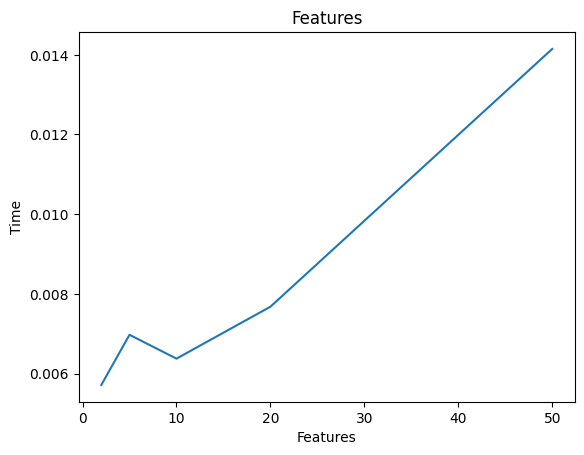

In [20]:
plt.plot(features, feat_times, label='Features')
plt.title('Features')
plt.xlabel('Features')
plt.ylabel('Time')
plt.show()

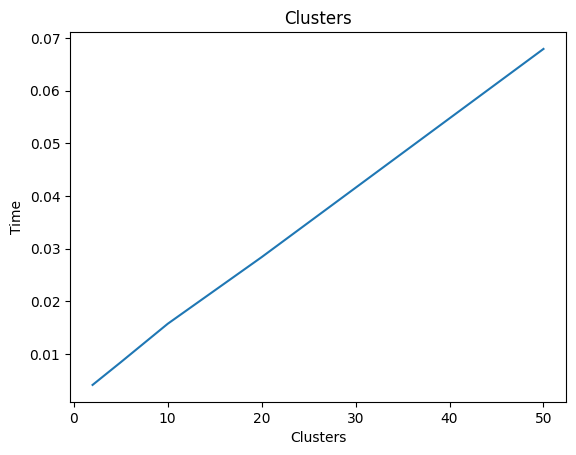

In [21]:
plt.plot(clusters, clus_times, label='Clusters')
plt.title('Clusters')
plt.xlabel('Clusters')
plt.ylabel('Time')
plt.show()

In [ ]:
# Empty cell

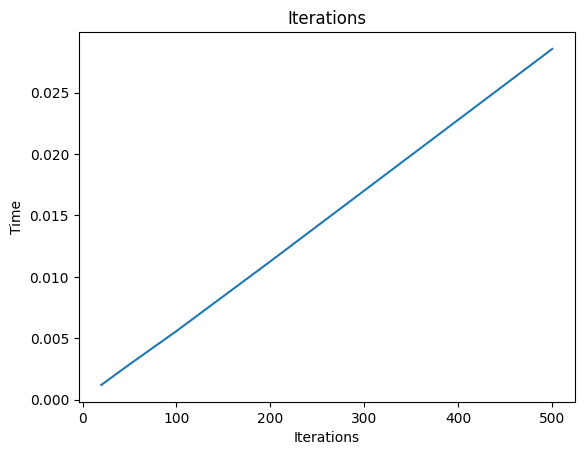

In [22]:
plt.plot(iterations, iter_times, label='Iterations')
plt.title('Iterations')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.show()
